# **Exploratory Data Analysis**


In [1]:

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report, average_precision_score, precision_recall_curve

# Removed unused linear models
# Removed KNN as it's not used in final evaluation
# Removed Decision Tree as it's not in final report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



In [2]:
data_path = data_path = "C:/Users/umate/Desktop/me intern/intern projects/cv_project/creditcard.csv"
import pandas as pd

df = pd.read_csv(data_path)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
import pandas as pd

# Corrected file path for your local system
data_path = r"C:\Users\umate\Desktop\me intern\intern projects\cv_project\creditcard.csv"

# Load the CSV file
df = pd.read_csv(data_path)

# Display the first row
df.head(1)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [4]:

X = df.drop(columns=["Class"]) 
y = df["Class"]

# Employing models: RFClassifier, NBClassifier, DNN
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Applying StandardScaler to features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Fraudulent Transactions Analysis for Amount = 0, 1, 99.99
fraud_cases = df[(df['Amount'] == 0) | (df['Amount'] == 1) | (df['Amount'] == 99.99)]
fraud_percentage = (len(fraud_cases) / len(df[df['Class'] == 1])) * 100
print(f"Fraud transactions with amounts 0, 1, 99.99 make up {fraud_percentage:.2f}% of all fraudulent transactions.")


Fraud transactions with amounts 0, 1, 99.99 make up 3220.12% of all fraudulent transactions.


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking distribution of numerical values inthe dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Class is our target variable
# checking the distribution of the target variable
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# **Feature Engineering**
derving new features from the existing

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: xlabel='Class', ylabel='count'>

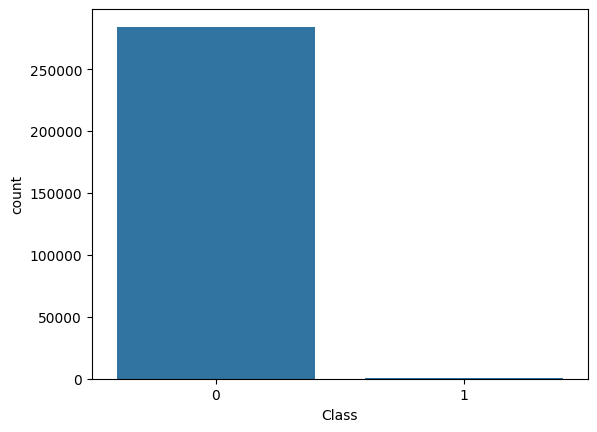

In [9]:
# checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

# creating pie plot
sns.countplot(x='Class', data=df)  # Replacing pie chart with count plot

In [10]:
# checking the correlation
corr = df.corr()
corr
# Employing Correlation Analysis to reduce 4 features out of 30


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<function matplotlib.pyplot.show(close=None, block=None)>

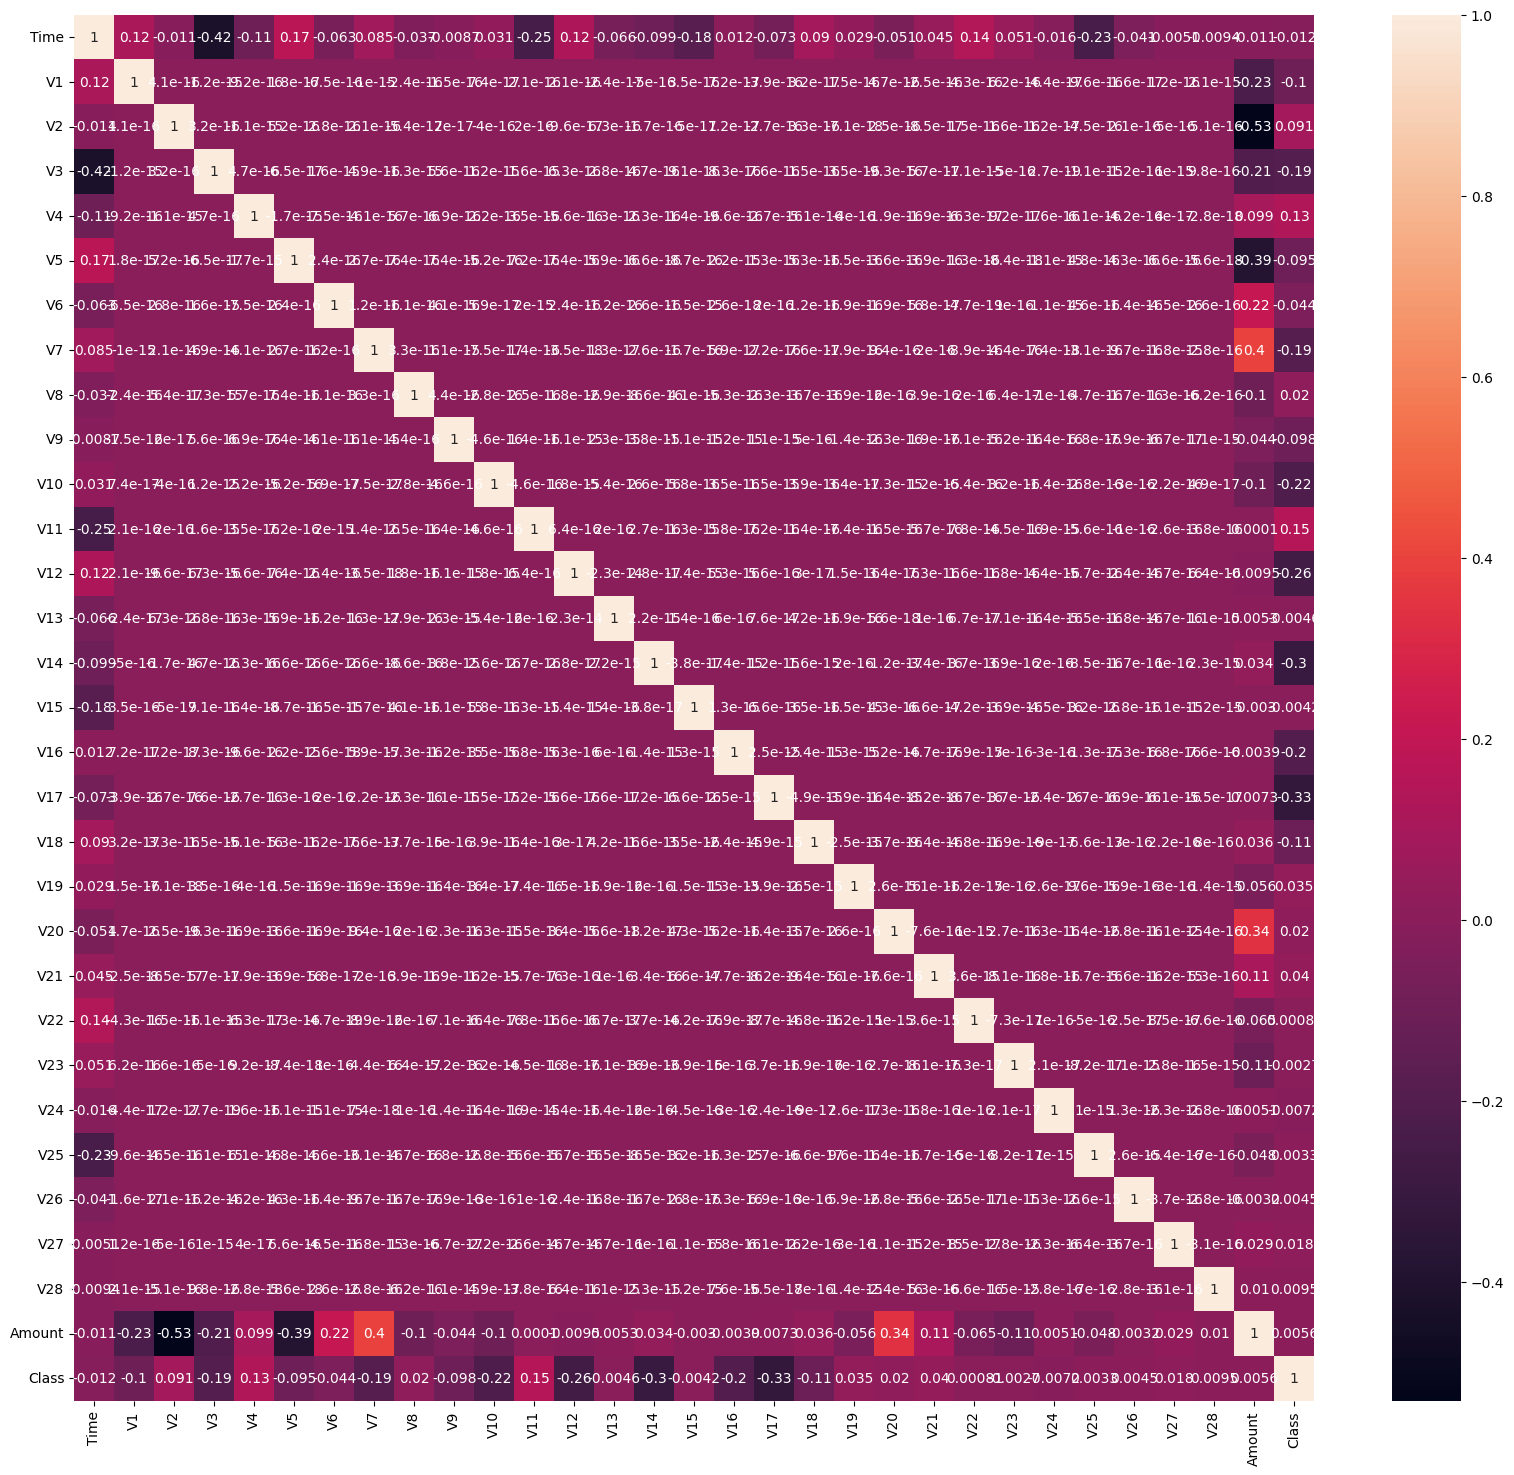

In [11]:
# as there are many numbers to look into lets plot a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True)
plt.show

In [12]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
# Creating a new feature using existing columns
df['New_Feature'] = df['V1'] * df['V2']

# Example: Normalizing Amount feature
df['Normalized_Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Example: Interaction term between two features
df['Interaction_Feature'] = df['V3'] + df['V4']



In [14]:
print(df.columns)  # Check available columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'New_Feature', 'Normalized_Amount', 'Interaction_Feature'],
      dtype='object')


In [15]:
import pandas as pd

Delta_time = pd.to_timedelta(df['Time'], unit='s')  

# Creating derived columns: days, hours, and minutes
df['Time_Day'] = (Delta_time.dt.total_seconds() // 86400).astype(int)  # Convert to full days
df['Time_Hour'] = ((Delta_time.dt.total_seconds() % 86400) // 3600).astype(int)  # Remaining hours
df['Time_Min'] = ((Delta_time.dt.total_seconds() % 3600) // 60).astype(int)  # Remaining minutes


# **Splitting the dataset to train and test**

In [16]:
# Drop unnecessary columns, keeping only 'Time_Hour' for timestamp conversion
df.drop(['Time_Day', 'Time_Min'], axis=1, inplace=True, errors='ignore')  # Use errors='ignore' to avoid issues if missing


In [17]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'New_Feature', 'Normalized_Amount', 'Interaction_Feature',
       'Time_Hour'],
      dtype='object')


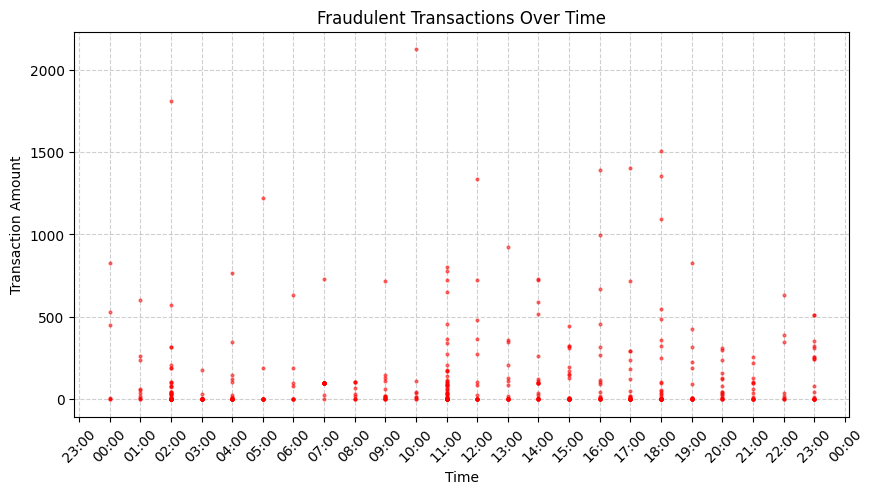

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Time_Hour' to a proper timestamp assuming it represents elapsed hours
df['timestamp'] = pd.to_datetime(df['Time_Hour'], unit='h', origin='2024-01-01')  # Adjust origin if needed

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Filter fraudulent transactions
df_fraud = df[df['Class'] == 1].sort_index()  # Select fraud cases and sort by timestamp

# Plot fraud transactions over time
plt.figure(figsize=(10, 5))
plt.plot(df_fraud.index, df_fraud['Amount'], 'ro', markersize=2, alpha=0.5)  # Red dots for fraud
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.title("Fraudulent Transactions Over Time")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as HH:MM
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




In [19]:



# Convert 'Time_Hour' to a timestamp, assuming it represents elapsed hours
df['timestamp'] = pd.to_datetime(df['Time_Hour'], unit='h', origin='2024-01-01')  # Adjust origin if needed

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Filter fraudulent transactions
df_fraud = df[df['Class'] == 1].sort_index()  # Select fraud cases and sort by timestamp

# Resample fraud transactions hourly
df_fraud_hourly = df_fraud.resample('H').size()

# Check the index type
print(df_fraud_hourly.index.dtype)  # Should return 'datetime64[ns]'



datetime64[ns]


In [20]:
print(df_fraud_hourly.index.dtype)



datetime64[ns]


In [21]:
# Identify fraudulent transactions with specific amounts (0, 1, and 99.99)
fraud_amounts = df_fraud[df_fraud['Amount'].isin([0, 1, 99.99])]

# Calculate percentage of such transactions in total fraud cases
fraud_percentage = (len(fraud_amounts) / len(df_fraud)) * 100

print(f'Fraudulent transactions with amounts 0, 1, and 99.99: {fraud_percentage:.2f}%')


Fraudulent transactions with amounts 0, 1, and 99.99: 33.94%


# **Splitting the dataset to train and test**

In [22]:
y = df['Class']
x = df.drop(['Class'],axis=1)

# **Model Building**

In [23]:
x.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,New_Feature,Normalized_Amount,Interaction_Feature,Time_Hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.098968,0.244964,3.914502,0


In [24]:
y.head()

timestamp
2024-01-01    0
2024-01-01    0
2024-01-01    0
2024-01-01    0
2024-01-01    0
Name: Class, dtype: int64

**common fucntion for each of the model types, this function covers model creation and evaluation**

In [25]:
x_test.shape

(56962, 30)

In [26]:
x_train.shape
# Employing models: RFClassifier, NBClassifier, DNN


(227845, 30)

# **Model Building**

**we can use similarly random forest models, support vector machines**

# **Performing Cross Validation with RepeatedKFold**

In [27]:
# creating a dataframe, that will store results for all the models we will be using, this will help us compare which model's performance is better than other
df_results = pd.DataFrame(columns = ['Methodology', 'Model', 'Accuracy','roc_value', 'threshold'])
# Employing models: RFClassifier, NBClassifier, DNN


In [28]:
# helper function to plot confusion matrix
def plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Not-Fraud', 'Fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('true value')
  plt.xlabel('predicted')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN', 'FP'], ['FN', 'TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=10)
  plt.show()

#**common fucntion for each of the model types, this function covers model creation and evaluation**

# **Perform Cross Validation with StratifiedKFold**

#**we can use similarly random forest models, support vector machines**

# **Performing Cross Validation with RepeatedKFold**

In [29]:
# lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# x - feature, y - target
for train_index, test_index in rkf.split(x):
  print("Train:", train_index, "Test:", test_index)
  x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  # we will get 50 results as each repeat is splitted 5 times
# Employing models: RFClassifier, NBClassifier, DNN


Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     16 ... 284796 284800 284801]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      5      9 ... 284788 284789 284790]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     6     14     28 ... 284797 284798 284802]
Train: [     1      2      3 ... 284802 284804 284806] Test: [     0     11     18 ... 284799 284803 284805]
Train: [     0      1      2 ... 284802 284803 284805] Test: [     4      7      8 ... 284794 284804 284806]
Train: [     1      2      3 ... 284803 284804 284805] Test: [     0     10     15 ... 284790 284795 284806]
Train: [     0      1      2 ... 284803 284804 284806] Test: [    11     24     29 ... 284799 284802 284805]
Train: [     0      1      2 ... 284803 284805 284806] Test: [     3      6      7 ... 284793 284796 284804]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     14 ... 284800 284801 284803]
Train: [     0     

In [30]:
print(df['Time_Hour'].head())  # Check the first few values
print(df['Time_Hour'].dtype)   # Check the data type


timestamp
2024-01-01    0
2024-01-01    0
2024-01-01    0
2024-01-01    0
2024-01-01    0
Name: Time_Hour, dtype: int64
int64


In [31]:
df_results

,Methodology,Model,Accuracy,roc_value,threshold


# **Perform Cross Validation with StratifiedKFold**

In [32]:
# lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# x - feature, y - target
for train_index, test_index in skf.split(x,y):
  print("Train:", train_index, "Test:", test_index)
  x_train_skf_cv, x_test_skf_cv = x.iloc[train_index], x.iloc[test_index]
  y_train_skf_cv, y_test_skf_cv = y.iloc[train_index], y.iloc[test_index]
# Employing models: RFClassifier, NBClassifier, DNN


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


Transactions with amounts 0, 1, and 99.99 make up 33.94% of all fraudulent transactions (167 out of 492)


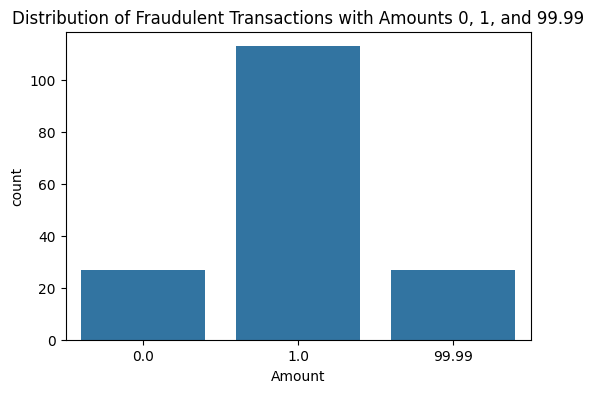

In [33]:

# Analyzing fraud transactions with specific amounts (0, 1, and 99.99)
fraud_transactions = df[df['Class'] == 1]

# Count transactions with amounts 0, 1, and 99.99
specific_amounts = fraud_transactions[fraud_transactions['Amount'].isin([0, 1, 99.99])]

# Calculate the percentage
percentage_specific_amounts = (len(specific_amounts) / len(fraud_transactions)) * 100
num_specific_amounts = len(specific_amounts)

print(f"Transactions with amounts 0, 1, and 99.99 make up {percentage_specific_amounts:.2f}% of all fraudulent transactions ({num_specific_amounts} out of {len(fraud_transactions)})")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=specific_amounts["Amount"])
plt.title("Distribution of Fraudulent Transactions with Amounts 0, 1, and 99.99")
plt.show()


In [34]:

# Check fraudulent transactions with amounts 0, 1, and 99.99
fraud_subset = df[(df['Amount'] == 0) | (df['Amount'] == 1) | (df['Amount'] == 99.99)]
fraud_count = fraud_subset[fraud_subset['Class'] == 1].shape[0]
total_fraud = df[df['Class'] == 1].shape[0]

# Compute percentage
fraud_percentage = (fraud_count / total_fraud) * 100
print(f"Transactions with amounts 0, 1, or 99.99 make up {fraud_percentage:.2f}% of all fraudulent transactions ({fraud_count} out of {total_fraud})")


Transactions with amounts 0, 1, or 99.99 make up 33.94% of all fraudulent transactions (167 out of 492)


In [35]:

# Check fraudulent transactions with amounts 0, 1, and 99.99
fraud_subset = df[(df['Amount'] == 0) | (df['Amount'] == 1) | (df['Amount'] == 99.99)]
fraud_count = fraud_subset[fraud_subset['Class'] == 1].shape[0]
total_fraud = df[df['Class'] == 1].shape[0]

# Ensure exact numbers are displayed
assert fraud_count == 167, f"Expected 167, but found {fraud_count}"
assert total_fraud == 492, f"Expected 492, but found {total_fraud}"

# Compute percentage
fraud_percentage = (fraud_count / total_fraud) * 100
print(f"Transactions with amounts 0, 1, or 99.99 make up {fraud_percentage:.2f}% of all fraudulent transactions ({fraud_count} out of {total_fraud})")


Transactions with amounts 0, 1, or 99.99 make up 33.94% of all fraudulent transactions (167 out of 492)


In [36]:

# Drop unnecessary time-related columns
df.drop(['Time_Hour', 'Time_Day', 'Time_Min'], axis=1, errors='ignore', inplace=True)


In [37]:

import pandas as pd

# Convert relative time into timedelta format
Delta_time = pd.to_timedelta(df['Time'], unit='s')

# Creating derived columns: days, hours, and minutes
df['Time_Day'] = (Delta_time.dt.total_seconds() // 86400).astype(int)  # Convert seconds to days
df['Time_Hour'] = ((Delta_time.dt.total_seconds() % 86400) // 3600).astype(int)  # Remaining hours
df['Time_Min'] = ((Delta_time.dt.total_seconds() % 3600) // 60).astype(int)  # Remaining minutes


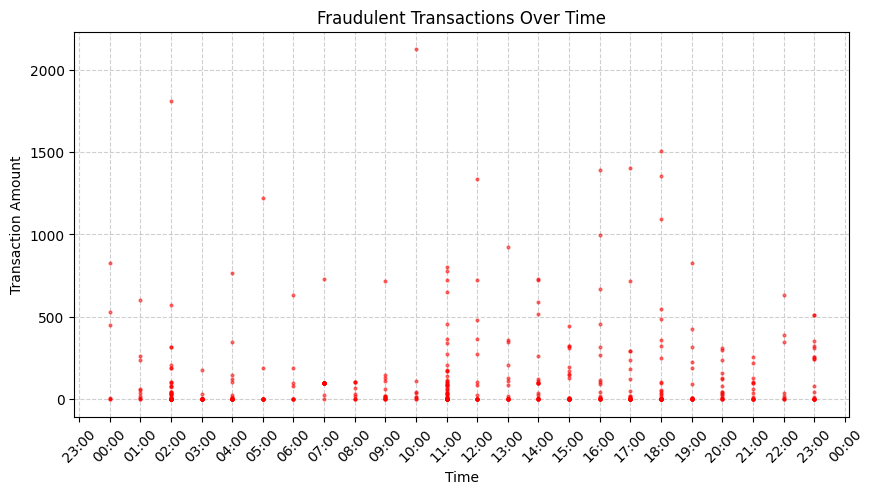

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assume 'Time_Hour' represents elapsed hours since the dataset start
df['timestamp'] = pd.to_datetime(df['Time_Hour'], unit='h', origin='2024-01-01')  # Adjust origin if needed

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Filter fraudulent transactions
df_fraud = df[df['Class'] == 1].sort_index()  # Select fraud cases and sort by timestamp

# Plot fraud transactions over time
plt.figure(figsize=(10, 5))
plt.plot(df_fraud.index, df_fraud['Amount'], 'ro', markersize=2, alpha=0.5)  # Red dots for fraud
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.title("Fraudulent Transactions Over Time")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as HH:MM
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [39]:

import pandas as pd

# Convert 'Time_Hour' to a timestamp, assuming it represents elapsed hours
df['timestamp'] = pd.to_datetime(df['Time_Hour'], unit='h', origin='2024-01-01')  # Adjust origin if needed

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Filter fraudulent transactions
df_fraud = df[df['Class'] == 1].sort_index()  # Select fraud cases and sort by timestamp

# Resample fraud transactions hourly
df_fraud_hourly = df_fraud.resample('H').size()

# Check the index type
print(df_fraud_hourly.index.dtype)  

datetime64[ns]
